In [2]:
import sys 
sys.path.append('/home/haroldvaz/computacional/lib/python3.8/site-packages')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1. **Descomposición LU**
**a)** A partir del programa para la ***Eliminación Gaussiana*** que hicimos en clase, escribe un programa que calcule la **descomposición LU** de una matriz. De hecho, el cálculo es el mismo que para la *eliminación gaussiana*, excepto que en cada paso del cálculo debes extraer los elementos apropiados de la matriz y ensamblarlos para formar la matriz diagonal inferior $\mathbb{L}$ (i.e; $\mathbb{L} = \mathbb{L_0^{-1}L_1^{-1}L_2^{-1}L_3^{-1}L_4^{-1}}...$).

In [4]:

def solu(A0,v0):
    A = A0.copy()
    v = v0.copy()
    N = len(v) # dimension
    Linv = np.identity(N,dtype=float)
    L = np.identity(N,dtype=float)
    # Eliminacion Gaussiana
    for m in range(N):
        # Creamos una matriz de ceros 
        L0 = np.zeros((N,N),dtype=float)
        L0inv = np.zeros((N,N),dtype=float)

        # Asignamos los valores de Linv
        for i in range(N):
            if i == m:
                L0[i][i] = 1/A[m][m]
            if i != m:
                L0[i][i] = A[m][m]/A[m][m]
        for j in range(m+1,N):
            L0[j][m] = -A[j][m]/A[m][m]
        Linv = np.matmul(L0,Linv)   

        # Asignamos los valores de L 
        for i in range(N):
            if i == m:
                L0inv[i][i] = A[m][m]
            if i != m:
                L0inv[i][i] = 1
        for j in range(m+1,N):
            L0inv[j][m] = A[j][m]
        L = np.matmul(L,L0inv) 
    
        # Localizo el elemento a pivotear
        div = A[m,m]    
        A[m,:] /= div  # divido el renglon que toca entre su pivote    

    ############ Una vez "pivoteado" el renglon

        for i in range(m+1,N):
            mult = A[i,m]          #encontramos el elemento por el que debemos multiplicar
            A[i,:] = A[i,:] - mult*A[m,:]   # y multiplicamo el renglon por dicho numero y se lo restamos al renglón de abajo    
    v = np.matmul(Linv,v)
    return A,Linv,L,v

        

**b)** Prueba tu programa calculando la descomposición $\mathbb{LU}$ de la matriz del sistema que abordamos en clase:

In [5]:
v0 = np.array([ -4, 3, 9, 7 ],float)  # Vector del sistema a resolve

A0 = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

U,Linv,L,v = solu(A0,v0)

print(U)
print("********************************")    
print(Linv)
print("********************************")    
print(L)
print("********************************")    
print(v)


[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]
********************************
[[ 0.5         0.          0.          0.        ]
 [-0.6         0.4         0.          0.        ]
 [ 0.23529412 -0.13235294 -0.07352941  0.        ]
 [ 0.11764706  0.30882353  0.83823529 -1.        ]]
********************************
[[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
********************************
[-2.   3.6 -2.   1. ]


**c)** Multiplica las matrices $\mathbb{L}$ y $\mathbb{U}$ que obtengas y verifica que se recupere la matriz original.

In [6]:
A1 = np.matmul(L,U)
print(L)
print("********************************")    
print(U)
print("********************************")    
print(A1)
print("********************************")

[[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
********************************
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]
********************************
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
********************************


**d)** Convierte tu programa en una función y usala para crear un programa completo para resolver el sistema (ec.1), realizando una doble sustitución inversa (*backsustitution*).

In [7]:
def soluchida(A,v):
    U,Linv,L,v = solu(A,v)
    N = len(v)
    
    x = np.empty(N,float)  #definimos unvector x vacio

    for m in range(N-1,-1,-1):
        x[m] = v[m]               #asignamos a x el valor del ultimo elemento
        for i in range(m+1,N):
            x[m] -= U[m,i]*x[i]

    return x

In [8]:
print(A0)
print("********************************")    
print(v0)
x = soluchida(A0,v0)
x

[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
********************************
[-4.  3.  9.  7.]


array([ 2., -1., -2.,  1.])

**e)** Resuelve el mismo sistema usando la función `solve`del paquete `numpy` y verifica que obtengas la misma respuesta, para cualquier otro sistema que propongas.

In [9]:
print(A0)
print("********************************")    
print(v0)
x2 = np.linalg.solve(A0, v0)
x2

[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
********************************
[-4.  3.  9.  7.]


array([ 2., -1., -2.,  1.])

In [10]:
A2 = np.array([[3,4,-1,-1],
               [0,1,4,1],
               [1,-4,1,5],
               [2,-2,1,3]],float)
v2 = np.array([3,-4,9,7],float)

x4 = soluchida(A2,v2)
x5 = np.linalg.solve(A2, v2)

print(x4)
print("********************************")    
print(x5)

[ 1.61904762 -0.42857143 -1.23809524  1.38095238]
********************************
[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


### 2. **Pozo cuántico asimétrico**
**a)**
<img src = "demo.JPG" style="width:1000px;height:1000px;">

**b)**

In [11]:
# Definimos las constantes
L = 0.5 # nm
a = 10 # eV
M = 9.1094e-31
c = 1.6022e-19
h = 6.5821e-16 

def H(m,n):
    if m!=n and ((m%2 == 0 and n%2 ==0) or (m%2 != 0 and n%2 !=0)):
        return 0
    if m!=n and ((m%2 == 0 and n%2 != 0) or (m%2 != 0 and n%2 ==0)):
        return - ((8*a)/ np.pi**2) * ((m*n)/(m**2-n**2)**2)
    if m ==n:
        return (n**2 * 1.5045 ) + ((a)/2)

**c)**

In [12]:
n,m= 10,10
Ha = np.zeros((m,n),float)

for i in range(1,m+1):
    for j in range(1,n+1):
        Ha[i-1][j-1] = H(i,j)
eigval, eigvec = np.linalg.eig(Ha)
print(np.sort(eigval))

[  5.83690249  11.18258977  18.66627514  29.15024766  42.66454545
  59.19890509  78.74794139 101.3097567  126.88210848 155.59322784]


**d)**

In [13]:
n,m= 100,100
Ha = np.zeros((m,n),float)

for i in range(1,m+1):
    for j in range(1,n+1):
        Ha[i-1][j-1] = H(i,j)
eigval, eigvec = np.linalg.eig(Ha)
print(eigval[66:76])

[   5.83690209   11.18258844   18.66627327   29.15023886   42.66453633
   59.19885252 1744.20319629 1545.60935027   78.74788958  101.30912594]


notamos que los eigenvalores son muy cercanos, hasta las primeras tres cifras después del puntol decimal son practicamente las mismas.

**e)**

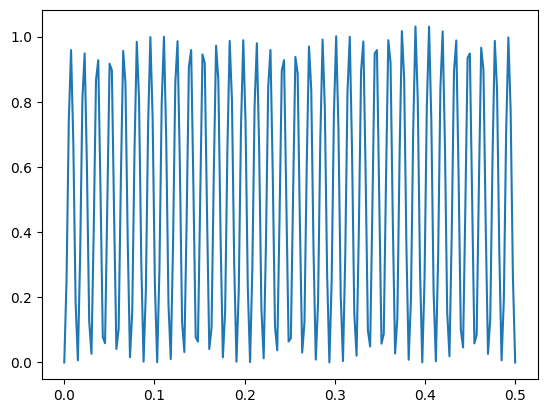

In [14]:
# Obtenemos las funciones de onda y con ello las densidades de probabilidad
def onda(n,x):
    sum = 0
    for i in range(100):
        sum = sum + eigvec[66+(n-1)][i] * np.sin((i+1)*np.pi*x/L)
    return sum

def densi(n,x):
    return onda(n,x)**2

x0 = np.linspace(0,L,200)
y1 = onda(1,x0)
y2 = onda(2,x0)
y3 = onda(3,x0)

#plt.plot(x0,densi(1,x0))
#plt.plot(x0,y2**2)
plt.plot(x0,y3**2);

In [15]:
from scipy.special import roots_legendre, eval_legendre
N=200
a1,b1 = 0,L

roots, weights = roots_legendre(N)
z1 = 0.5*(b1-a1) *roots + (b1+a1)/2
w1 = 0.5*(b1-a1)* weights

s1 = 0
s2 = 0
s3 = 0

for i in range(N):
    s1+= w1[i]*densi(1,z1[i])
    s2+= w1[i]*densi(2,z1[i])
    s3+= w1[i]*densi(3,z1[i])
print(s1,s2,s3)

0.2500000000000026 0.25000000000000266 0.2500000000000029


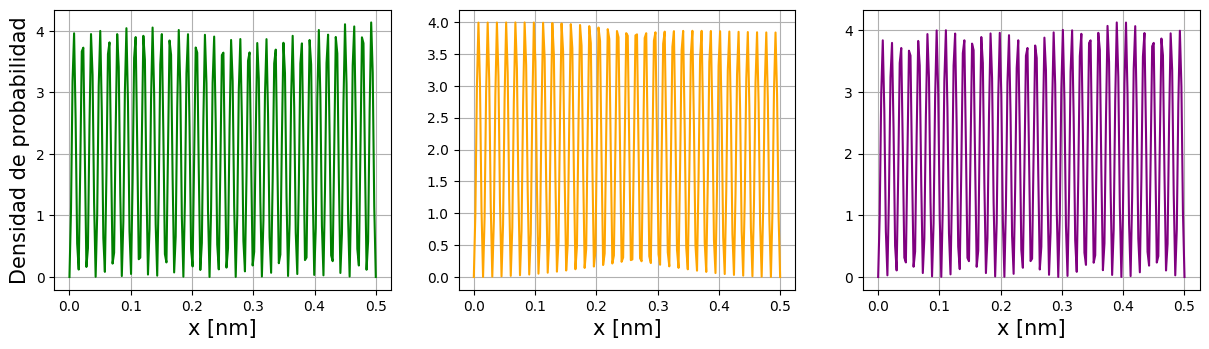

In [16]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)

ax1.plot(x0,4*densi(1,x0),c='green')
ax1.grid()
ax1.set_xlabel('x [nm]', size=15)
ax1.set_ylabel('Densidad de probabilidad', size=15)

ax2.plot(x0,4*densi(2,x0),c='orange')
ax2.grid()
ax2.set_xlabel('x [nm]', size=15)

ax3.plot(x0,4*densi(3,x0),c='purple')
ax3.grid()
ax3.set_xlabel('x [nm]', size=15);

### 3. **Método de relajación**
**a)** Escribe un programa para resolver esta ecuación para $x$ usando el método de relajación para $c=2$. Calcula su solución con una precisión (exactitud) de al menos $10^{-6}$.

In [17]:
# Definimos las constantes 
c = 2
x0 = 1.
error = 1.
accuracy = 1e-6

while error > accuracy:
    x0, x1 = 1-np.exp(-c*x0), x0
    error = np.abs((x0-x1)/(1-(np.exp(c*x1)/c)))

x0

0.7968126311118457

**b)** Modifica tu programa para calcular la solución para valores de $c$ de 0 a 3 en pasos de 0.01 y haz una gráfica de $x$ en función de $c$. Deberías ver una transición clara de un régimen en el que $x=0$ a un régimen en el que $x$ es distinto de cero. Este es otro ejemplo de ***transición de fase***. En física, esta transición se conopce como *transición de percolación;* y en epidemiología es lo que se conoce como *umbral epidémico*.

In [18]:
# Definimos el intervalo de c
dc = 0.01
C = np.arange(0+dc,3+dc,dc)
accuracy = 1e-6
x = []

for c in C:
    x0 = 1.
    error = 1.
    while error > accuracy:
        x0, x1 = 1-np.exp(-c*x0), x0
        error = np.abs((x0-x1)/(1-(np.exp(c*x1)/c)))
    x.append(x0)


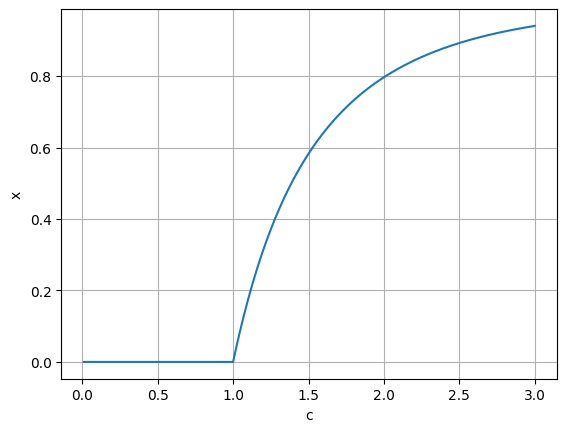

In [19]:
plt.plot(C,x)
plt.ylabel('x')
plt.xlabel('c')
plt.grid();

### 4. **Glucólisis**

**a)** Demuestra analíticamente que la solución de estas ecuaciones es 
$$x=b, \hspace{1cm} y=\frac{b}{a+b^2}$$
igualando las expresiones se tiene que
$$x-ay-x^2y=0=b-ay-x^2y, $$
cancelando los términos iguales
$$x=b$$
de $-x+ay+x^2y=0$ despejamos $y$
$$ y = \frac{x}{a+x^2}$$
pero $x=b$
$$y= \frac{b}{a+b^2}$$

**b)** Demuestra que las ecuaciones se pueden reorganizar de la siguiente manera:
$$x = y(a+x^2), \hspace{1cm} y = \frac{b}{a+x^2}$$
y escribe un programa para resolver estas ecuaciones usando el método de relajación con $a=1$ y $b=1$. Deberías encontrar que el método no logra converger a una solución para este caso.

De la ecuación $b-ay-x^2y=0$ despejamos $b$
$$b = y(a+x^2)$$
como $x=b$, entonces 
$$x = y (a+x^2)$$
asimismo de $b$ podemos despejar $y$
$$ y = \frac{b}{a+x^2}$$

In [20]:
x0 = 10.
a = 1
b = 2
y0 = 10.
n = 70

for i in range(n):
    print('x =',x0,'y =',y0)
    x = y0*(a + x0**2)
    y = b / (a + x0**2)
    x0 = x
    y0 = y
    

x = 10.0 y = 10.0
x = 1010.0 y = 0.019801980198019802
x = 20200.019801980197 y = 1.960590176855037e-06
x = 800.0007861974296 y = 4.901470625233083e-09
x = 0.0031369522672605996 y = 3.1249889750559585e-06
x = 3.12501972641474e-06 y = 1.9999803192546137
x = 1.999980319274145 y = 1.9999999999804685
x = 9.999842554870167 y = 0.40000629790044445
x = 40.39937651699049 y = 0.01980259758376303
x = 32.3398126736788 y = 0.001224657531790854
x = 1.2820492501540723 y = 0.0019104687774571512
x = 0.005050611318113154 y = 0.7565297177415263
x = 0.7565490158119871 y = 1.9999489839519782
x = 3.1446526107317228 y = 1.271968151347957
x = 13.850257738777646 y = 0.18367429333632235
x = 35.41784775670779 y = 0.010371849503562012
x = 13.021068165917068 y = 0.0015930873521898237
x = 0.27169820613721796 y = 0.011726888998194223
x = 0.012592566949813954 y = 1.8625096924130278
x = 1.8628050356826735 y = 1.9996829047978846
x = 8.938667772867435 y = 0.4474230289367621
x = 36.196425303078335 y = 0.02472194561702814

**c)** Encuentra una forma diferente de reorganizar las ecuaciones de manera que cuando apliques el método de relajación nuevamente converja a un *punto fijo* y proporciona una solución. Verifica que la solución que obtengas concuerde con la del inciso **a)**.

Si se escribe $x$ y $y$ como 
$$ x = \sqrt{\frac{b}{y}-a} \hspace{1cm} y = \frac{x}{a+x^2}$$

In [21]:
x0 = 1
a = 1
b = 2
y0 = 1
n = 70

for i in range(n):
    print('x =',x0,'y =',y0)
    x = np.sqrt((b/y0)-a)
    y = x0 / (a + x0**2)
    x0 = x
    y0 = y

x = 1 y = 1
x = 1.0 y = 0.5
x = 1.7320508075688772 y = 0.5
x = 1.7320508075688772 y = 0.43301270189221935
x = 1.902314945932194 y = 0.43301270189221935
x = 1.902314945932194 y = 0.4118632672940252
x = 1.9636650714924069 y = 0.4118632672940252
x = 1.9636650714924069 y = 0.40438075610800917
x = 1.9864122863201303 y = 0.40438075610800917
x = 1.9864122863201303 y = 0.40163345114218674
x = 1.9949097477571613 y = 0.40163345114218674
x = 1.9949097477571613 y = 0.400611243354449
x = 1.9980918687165672 y = 0.400611243354449
x = 1.9980918687165672 y = 0.4002290339314792
x = 1.9992845505793713 y = 0.4002290339314792
x = 1.9992845505793713 y = 0.40008586211625663
x = 1.9997317204769791 y = 0.40008586211625663
x = 1.9997317204769791 y = 0.40003219469412865
x = 1.9998993971476058 y = 0.40003219469412865
x = 1.9998993971476058 y = 0.40001207250421084
x = 1.9999622742071335 y = 0.40001207250421084
x = 1.9999622742071335 y = 0.4000045271179152
x = 1.9999858528665935 y = 0.4000045271179152
x = 1.9999858

### 5. **Constante de desplazamiento de Wien**
**a)** Demuestra diferenciando (*derivando*) que la longitud de onda $\lambda$ a la que la radiación emitida alcanza su mayor intensidad, es la solución a la ecuación 
$$ 5e^{-hc/\lambda \kappa_B T} + \frac{hc}{\lambda \kappa_B T}-5 = 0$$
Sustituye $x=hc/\lambda \kappa_B T$ y demuestra que la longitud de onda de la radiación máxima obedece al *desplazamiento de Wienley*:
$$\lambda = \frac{b}{T},$$
donde la llamada *constante de desplazamiento de Wien* es $b = hc/\kappa_B x$, y $x$ es la solución de la ecuación no lineal
$$ 5e^{-x}+x-5=0$$

Derivando la expresión $I(\lambda)= \dfrac{2\pi hc^2 \lambda^{-5}}{e^{hc/\lambda \kappa_B T}-1}$ e igualando a cero se tiene que 
$$ \frac{dI}{d\lambda}= \frac{2 \pi  c^3 h^2 e^{c h/k_B T \lambda}}{k_B T \lambda^7\left(e^{c h/k_B T\lambda }-1\right)^2}-\frac{10 \pi  c^2 h}{\lambda^6 \left(e^{c h/k_B T \lambda}-1\right)}=0$$
factorizanto términos y multiplicando por $1/2 \left(e^{hc/\lambda k_B T}-1\right)^2$
$$\frac{\pi c^2 h}{\lambda^6} \left( \frac{ch}{k_BT\lambda}e^{hc/k_B T \lambda}+5-5e^{hc/k_BT\lambda} \right)=0$$
multiplicando ambos lados por $\frac{\lambda^6}{\pi c^2 h}e^{-hc/\lambda k_B T}$
$$5e^{-hc/\lambda k_BT} + \frac{hc}{\lambda k_B T} -5 =0$$
sustituimos $x=hc/\lambda k_BT$ 
$$ 5e^{-x}+x-5=0$$
entonces $x$ es solución, si $\lambda= \frac{b}{T}$, con $b= hc/k_B x$ se tiene que 
$$ 5e^{-hc/\lambda k_B T}+\frac{hc}{\lambda k_B T} -5 =5e^{-hc/b k_B }+\frac{hc}{b k_B } -5 $$
$$= 5e^{-x}+x-5 = 0$$
$$\therefore \lambda = \frac{b}{T} \ \text{es máximo}$$

**b)** Escribe un programa para resolver esta ecuación con una precisión (exactitud) de $\epsilon = 10^{-6}$ usando el método de búsqueda binaria y así, encuentra un valor para la constante de desplazamiento.

In [22]:
# Determinamos el número de iteraciones 
x1 = 1
x2 = 10
accuracy = 1e-6
n = int(np.log2((x2-x1)/accuracy))

# Definimos la función 
def func(x):
    return 5*np.exp(-x)+x-5

for i in range(n):
    xr = 0.5 *( x1 + x2)
    if np.sign(func(xr))==np.sign(func(x1)):
        x1 = xr
    else:
        x2 = xr

print(func(xr),xr)

6.94293007086344e-07 4.965114951133728


**c)** La ley de desplazamiento es la base del método de *pirometría óptica*, un método para medir las temperaturas de los objetos observando el color de la radiación térmica que emiten. El método se utiliza habitualmente para estimar las temperaturas superficiales de lor cuerpos astronómicos, como el Sol. El pico de longitud de onda en la radiación emitida por el Sol cae en $\lambda = 502$nm. A partir de las ecuaciones anteriores y el valor de la constante de desplazamiento, estima la temperatura de la superficie del Sol.

In [23]:
# Definimos las constantes
h = 6.626e-34 # J/Hz
c = 3e8 #m/s
kB = 1.380e-23 #m^2kgs^-2K^-1

b = (h*c)/(kB*xr)
lamb = 5.02e-7 #m 

# Calculamos e imprimimos la temperatura
T = b/lamb
print('La temperatura del Sol es:',T,'K')

La temperatura del Sol es: 5779.104865584802 K


### 6. **El punto de Lagrange**
**a)** Suponiendo que las órbitas son circulares y que la Tierra es mucho más masiva que la Luna o el satélite, demuestra que la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:
$$ \frac{GM}{r^2} - \frac{Gm}{(R-r)^2} =  \omega^2r,$$
donde $M$ y $m$ son las masa de la Tierra y la Luna, $G$ es la constante gravitacional de Newton y $\omega$ es la velocidad angular tanto de la Luna como del satélite.

Sabemos que la fuerza gravitacional que siente el satélite por parte de la Tierra y de la Luna está dada por 
$$ \vec{F_T} = -G\frac{Mm_s}{r^2}\hat{r} \hspace{1cm} \vec{F_L}=G\frac{mm_s}{(R-r)^2}\hat{r} $$
mientras que por la trayectoria circular del satélite también existe una fuerza centrípeta
$$ \vec{F_C} = -m_s \omega^2 r \hat{r}$$ 
entonces sumando las fuerzas se tiene que 
$$ G\frac{Mm_s}{r^2}\hat{r}-G\frac{mm_s}{(R-r)^2}\hat{r} = m_s \omega^2 r\hat{r}$$
como todo va en la misma dirección y cancelando $m_s$ se tiene 
$$ G\frac{M}{r^2}-G\frac{m}{(R-r)^2} =  \omega^2 r$$

**b)** La ecuación anterior es una ecuación polinómica de quinto orden en $r$. Estas ecuaciones no se pueden resolver exactamente de forma cerrada, pero es sencillo resolverlas numéricamente. Escribe un programa que utilice el ***método de Newton*** para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$. Calcula una solución con una precisión (exactitud) de al menos cuatro cifras significativas.

In [24]:
# Definimos las constantes
G = 6.674e-11 # m^3kg^-1s^-2
M = 5.974e24 # kg
m = 7.348e22 # kg
R = 3.844e8 # m 
w = 2.662e-6 # s^-1

def fuer(r):
    return (G*M / r**2) - (G*m/(R-r)**2) - r*w**2

def df(r):
    return -(G*M / r**3) - (G*m/(R-r)**3) - w**2

x0 = 1.
delta = 1.
accuracy = 1e-6

while abs(delta) > accuracy:
    delta = fuer(x0)/df(x0)
    x0 = x0 - delta

r = x0
print('El punto de Lagrange se localiza a {0:.4f}m de la Tierra'.format(r))

El punto de Lagrange se localiza a 326045071.6654m de la Tierra
